In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import sys
!{sys.executable} -m pip install odeintw
from odeintw import odeintw

In [88]:
KAI = 1     #Mhz
KAPPA = 1   #MHz
KERR = 0.01 #MHz

T_LENGTH = 100
T_LIST = np.linspace(0, 20, T_LENGTH + 1)

B_R_CONST = 10
B_I_CONST = 2

# First Trying out Constant Odeint wo Kerr

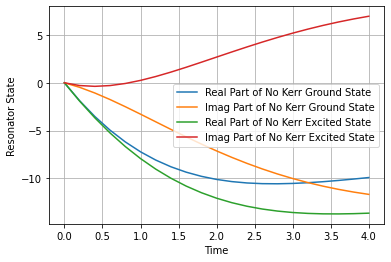

In [54]:
def nokerr_ground_func(alpha, t):
    alphar, alphai = alpha
    d_alphar_dt = -KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*B_R_CONST
    d_alphai_dt = KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*B_I_CONST
    return [d_alphar_dt, d_alphai_dt]

def nokerr_excited_func(alpha, t):
    alphar, alphai = alpha
    d_alphar_dt = KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*B_R_CONST
    d_alphai_dt = -KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*B_I_CONST
    return [d_alphar_dt, d_alphai_dt]

init_state = np.array([0, 0])

results_g = odeint(nokerr_ground_func, init_state, T_LIST)
results_e = odeint(nokerr_excited_func, init_state, T_LIST)


def grapher(mode):
    if mode == 0:
        plt.clf()
        plt.plot(T_LIST, results_g[:,0], label="Real Part of No Kerr Ground State")
        plt.plot(T_LIST, results_g[:,1], label="Imag Part of No Kerr Ground State")
        plt.plot(T_LIST, results_e[:,0], label="Real Part of No Kerr Excited State")
        plt.plot(T_LIST, results_e[:,1], label="Imag Part of No Kerr Excited State")
        plt.xlabel("Time")
        plt.ylabel("Resonator State")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 1:
        plt.clf()
        plt.plot(results_g[:,1], results_g[:,0], label="Ground State")
        plt.plot(results_e[:,1], results_e[:,0], label="Excited State")
        plt.xlabel("Q")
        plt.ylabel("I")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()

grapher(0)

# Now Trying out with Kerr

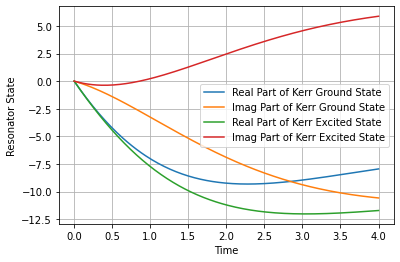

In [28]:
def kerr_ground_func(alpha, t):
    alphar, alphai = alpha
    d_alphar_dt = -KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*B_R_CONST + KERR*(alphar**2 + alphai**2)
    d_alphai_dt = KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*B_I_CONST
    return [d_alphar_dt, d_alphai_dt]

def kerr_excited_func(alpha, t):
    alphar, alphai = alpha
    d_alphar_dt = KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*B_R_CONST + KERR*(alphar**2 + alphai**2)
    d_alphai_dt = -KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*B_I_CONST
    return [d_alphar_dt, d_alphai_dt]

init_state = np.array([0, 0])

results_withKerr_g = odeint(kerr_ground_func, init_state, T_LIST)
results_withKerr_e = odeint(kerr_excited_func, init_state, T_LIST)


def grapher(mode):
    if mode == 0:
        plt.clf()
        plt.plot(T_LIST, results_withKerr_g[:,0], label="Real Part of Kerr Ground State")
        plt.plot(T_LIST, results_withKerr_g[:,1], label="Imag Part of Kerr Ground State")
        plt.plot(T_LIST, results_withKerr_e[:,0], label="Real Part of Kerr Excited State")
        plt.plot(T_LIST, results_withKerr_e[:,1], label="Imag Part of Kerr Excited State")
        plt.xlabel("Time")
        plt.ylabel("Resonator State")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 1:
        plt.clf()
        plt.plot(results_withKerr_g[:,1], results_withKerr_g[:,0], label="Ground State w Kerr")
        plt.plot(results_withKerr_e[:,1], results_withKerr_e[:,0], label="Excited State w Kerr")
        plt.xlabel("Q")
        plt.ylabel("I")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()

grapher(0)

# Now trying a Pulse Function with Kerr

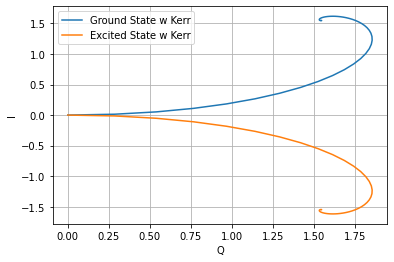

In [92]:
real_pulse_arr = np.zeros_like(T_LIST)
imag_pulse_arr = np.zeros_like(T_LIST)

for i in range(len(real_pulse_arr)):
    #if int(T_LENGTH/4) < i < int(T_LENGTH/2):
    real_pulse_arr[i] = -1.5
    imag_pulse_arr[i] = 0

real_func = interp1d(T_LIST, real_pulse_arr, bounds_error=False, fill_value="extrapolate")
imag_func = interp1d(T_LIST, imag_pulse_arr, bounds_error=False, fill_value="extrapolate")


def kerr_ground_func(alpha, t, real_in, imag_in):
    alphar, alphai = alpha
    d_alphar_dt = -KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*real_in(t) + KERR*(alphar**2 + alphai**2)
    d_alphai_dt = KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*imag_in(t)
    return [d_alphar_dt, d_alphai_dt]

def kerr_excited_func(alpha, t, real_in, imag_in):
    alphar, alphai = alpha
    d_alphar_dt = KAI/2*alphai - KAPPA/2*alphar - np.sqrt(KAPPA)*real_in(t) + KERR*(alphar**2 + alphai**2)
    d_alphai_dt = -KAI/2*alphar - KAPPA/2*alphai - np.sqrt(KAPPA)*imag_in(t)
    return [d_alphar_dt, d_alphai_dt]

init_state = np.array([0, 0])

results_withKerr_g = odeint(kerr_ground_func, init_state, T_LIST, args=(real_func, imag_func))
results_withKerr_e = odeint(kerr_excited_func, init_state, T_LIST, args=(real_func, imag_func))

distance = np.sqrt( (results_withKerr_e[:,0] - results_withKerr_g[:,0])**2 + (results_withKerr_g[:,1] - results_withKerr_e[:,1])**2 )

ground_number = results_withKerr_g[:,0]**2 + results_withKerr_g[:,1]**2
excited_number = results_withKerr_e[:,0]**2 + results_withKerr_e[:,1]**2

def grapher(mode):
    if mode == 0:
        plt.clf()
        plt.plot(T_LIST, results_withKerr_g[:,0], label="Real Part of Kerr Ground State")
        plt.plot(T_LIST, results_withKerr_g[:,1], label="Imag Part of Kerr Ground State")
        plt.plot(T_LIST, results_withKerr_e[:,0], label="Real Part of Kerr Excited State")
        plt.plot(T_LIST, results_withKerr_e[:,1], label="Imag Part of Kerr Excited State")
        plt.xlabel("Time")
        plt.ylabel("Resonator State")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 1:
        plt.clf()
        plt.plot(results_withKerr_g[:,0], results_withKerr_g[:,1], label="Ground State w Kerr")
        plt.plot(results_withKerr_e[:,0], results_withKerr_e[:,1], label="Excited State w Kerr")
        plt.xlabel("Q")
        plt.ylabel("I")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 2:
        plt.clf()
        plt.plot(T_LIST, distance, label="Distance of instantaneous IQ with Time")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 3:
        plt.clf()
        plt.plot(T_LIST, ground_number, label="Number of Photons for Ground")
        plt.plot(T_LIST, excited_number, label="Number of Photons for Excited")
        plt.xlabel("Time")
        plt.ylabel("Number of Photons")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 4:
        plt.clf()
        plt.plot(T_LIST, real_pulse_arr, label="Real Part of Pulse")
        plt.plot(T_LIST, imag_pulse_arr, label="Imag Part of Pulse")
        plt.xlabel("Time")
        plt.ylabel("Number of Photons")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()

grapher(1)

In [62]:
real_pulse_arr = np.zeros_like(T_LIST) + B_R_CONST
imag_pulse_arr = np.zeros_like(T_LIST) + B_I_CONST
real_func = interp1d(T_LIST, real_pulse_arr, bounds_error=False, fill_value="extrapolate")
imag_func = interp1d(T_LIST, imag_pulse_arr, bounds_error=False, fill_value="extrapolate")


def ground_func(alpha, t):
    d_alpha_dt = (1j*KAI/2 - KAPPA/2)*alpha - np.sqrt(KAPPA)*(real_func(t) + 1j*imag_func(t))
    return d_alpha_dt

def ground_jac(alpha, t):
    return np.array([1j*KAI/2 - KAPPA/2])

def excited_func(alpha, t):
    d_alpha_dt = (-1j*KAI/2 - KAPPA/2)*alpha - np.sqrt(KAPPA)*(real_func(t) + 1j*imag_func(t))
    return d_alpha_dt

def excited_jac(alpha, t):
    return np.array([-1j*KAI/2 - KAPPA/2])

odeintw_init_state = np.array([0 + 0j])

odeintw_g = odeintw(ground_func, odeintw_init_state, T_LIST, Dfun=ground_jac, full_output=True)
odeintw_e = odeintw(excited_func, odeintw_init_state, T_LIST, Dfun=excited_jac, full_output=True)

def grapher(mode):
    if mode == 0:
        plt.clf()
        plt.plot(T_LIST, odeintw_g[0].real, label="Real Part of Kerr Ground State")
        plt.plot(T_LIST, odeintw_g[0].imag, label="Imag Part of Kerr Ground State")
        plt.plot(T_LIST, odeintw_e[0].real, label="Real Part of Kerr Excited State")
        plt.plot(T_LIST, odeintw_e[0].imag, label="Imag Part of Kerr Excited State")
        plt.xlabel("Time")
        plt.ylabel("Resonator State")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    if mode == 1:
        plt.clf()
        plt.plot(odeintw_g[0].imag, odeintw_g[0].real, label="Ground State w Kerr")
        plt.plot(odeintw_e[0].imag, odeintw_e[0].real, label="Excited State w Kerr")
        plt.xlabel("Q")
        plt.ylabel("I")
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()

grapher(2)

In [80]:
arr = np.zeros(202)
real = arr[0:101]
imag = arr[101:202]


real size: (101,)
imag shape: (101,)


In [96]:
arr = np.array([1,2,3,4,5])
index = np.where(arr == 4)
print(index[0][0])

3
